In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud
import matplotlib.font_manager as fm

In [148]:
character_beauty_1 = pd.read_csv('character_beauty_1.csv')
character_beauty_2 = pd.read_csv('character_beauty_2.csv')
character_cashitem = pd.read_csv('character_cashitem.csv')

In [149]:
character_beauty = pd.concat([character_beauty_1,character_beauty_2],axis=0)
character_beauty = character_beauty.reset_index(drop=True)

In [150]:
character_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   character_name        463 non-null    object
 1   world_name            463 non-null    object
 2   character_gender      463 non-null    object
 3   character_class       463 non-null    object
 4   character_level       463 non-null    int64 
 5   character_guild_name  460 non-null    object
 6   hair_name             463 non-null    object
 7   hair_base_color       463 non-null    object
 8   hair_mix_color        416 non-null    object
 9   hair_mix_rate         463 non-null    int64 
 10  face_name             463 non-null    object
 11  face_base_color       463 non-null    object
 12  face_mix_color        357 non-null    object
 13  face_mix_rate         463 non-null    int64 
 14  skin_name             463 non-null    object
dtypes: int64(3), object(12)
memory usage: 54

In [151]:
character_beauty.head()

,character_name,world_name,character_gender,character_class,character_level,character_guild_name,hair_name,hair_base_color,hair_mix_color,hair_mix_rate,face_name,face_base_color,face_mix_color,face_mix_rate,skin_name
0,오지환,루나,여,키네시스,297,루나,갈색 블랑슈 헤어,갈색,보라색,50,조용한 눈 얼굴,에메랄드,갈색,50,홍조 라벤더 피부
1,단솜,스카니아,여,윈드브레이커,297,봄연,보라색 말괄량이 헤어,보라색,초록색,50,졸린 오드아이 얼굴,자수정,초록색,21,커스텀 홍조 피치 피부
2,버터,엘리시움,남,나이트로드,296,BOSS,검은색 플로리안 헤어,검은색,초록색,22,졸린 얼굴,검은색,NaN,0,뽀송 라벤더 피부
3,솝상,크로아,여,비숍,296,생글,초록색 여우소녀 헤어,초록색,NaN,0,뭐요 얼굴,빨간색,NaN,0,홍조 꽃잎 피부
4,테룽이,이노시스,남,카이저,296,프라하,검은색 프림로즈 헤어,검은색,NaN,0,흥흥 얼굴,파란색,보라색,50,뽀송 꽃잎 피부


In [152]:
character_beauty['hair_name'] = character_beauty['hair_name'].apply(lambda x:x.split()[1:])
character_beauty['hair_name'] = character_beauty['hair_name'].apply(lambda x:' '.join(x))

In [153]:
character_beauty.drop(['character_guild_name','hair_mix_rate','face_mix_rate'],axis=1,inplace=True)
character_beauty["hair_mix_color"]=character_beauty["hair_mix_color"].fillna('X')
character_beauty["face_mix_color"]=character_beauty["face_mix_color"].fillna('X')

character_beauty['hair_2'] = character_beauty.apply(lambda row: sorted([row['hair_base_color'], row['hair_mix_color']]), axis=1)

character_beauty['hair_color'] = character_beauty['hair_2'].apply(lambda x: '+'.join(x))
character_beauty.drop(['hair_2'],axis=1,inplace=True)
character_beauty['hair'] = character_beauty['hair_name'] + '+' + character_beauty['hair_color']

In [154]:
character_beauty['face'] = character_beauty['face_name'] + '+' + character_beauty['face_base_color'] + '+' + character_beauty['face_mix_color']

character_beauty['face_2'] = character_beauty.apply(lambda row: sorted([row['face_base_color'], row['face_mix_color']]), axis=1)
character_beauty['face_color'] = character_beauty['face_2'].apply(lambda x: '+'.join(x))
character_beauty.drop(['face_2'],axis=1,inplace=True)
character_beauty['face'] = character_beauty['face_name'] + '+' + character_beauty['face_color']

character_beauty.drop(['hair_base_color','hair_mix_color','face_base_color','face_mix_color'],axis=1,inplace=True)

In [155]:
character_beauty.head()

,character_name,world_name,character_gender,character_class,character_level,hair_name,face_name,skin_name,hair_color,hair,face,face_color
0,오지환,루나,여,키네시스,297,블랑슈 헤어,조용한 눈 얼굴,홍조 라벤더 피부,갈색+보라색,블랑슈 헤어+갈색+보라색,조용한 눈 얼굴+갈색+에메랄드,갈색+에메랄드
1,단솜,스카니아,여,윈드브레이커,297,말괄량이 헤어,졸린 오드아이 얼굴,커스텀 홍조 피치 피부,보라색+초록색,말괄량이 헤어+보라색+초록색,졸린 오드아이 얼굴+자수정+초록색,자수정+초록색
2,버터,엘리시움,남,나이트로드,296,플로리안 헤어,졸린 얼굴,뽀송 라벤더 피부,검은색+초록색,플로리안 헤어+검은색+초록색,졸린 얼굴+X+검은색,X+검은색
3,솝상,크로아,여,비숍,296,여우소녀 헤어,뭐요 얼굴,홍조 꽃잎 피부,X+초록색,여우소녀 헤어+X+초록색,뭐요 얼굴+X+빨간색,X+빨간색
4,테룽이,이노시스,남,카이저,296,프림로즈 헤어,흥흥 얼굴,뽀송 꽃잎 피부,X+검은색,프림로즈 헤어+X+검은색,흥흥 얼굴+보라색+파란색,보라색+파란색


In [156]:
character_s = character_beauty[['character_name', 'world_name', 'character_gender']].drop_duplicates()

In [157]:
character_s['character_gender'].value_counts()

남     248
여     178
기타     11
Name: character_gender, dtype: int64

In [158]:
len(set(character_beauty['character_name']))

437

In [159]:
character_beauty.head()

,character_name,world_name,character_gender,character_class,character_level,hair_name,face_name,skin_name,hair_color,hair,face,face_color
0,오지환,루나,여,키네시스,297,블랑슈 헤어,조용한 눈 얼굴,홍조 라벤더 피부,갈색+보라색,블랑슈 헤어+갈색+보라색,조용한 눈 얼굴+갈색+에메랄드,갈색+에메랄드
1,단솜,스카니아,여,윈드브레이커,297,말괄량이 헤어,졸린 오드아이 얼굴,커스텀 홍조 피치 피부,보라색+초록색,말괄량이 헤어+보라색+초록색,졸린 오드아이 얼굴+자수정+초록색,자수정+초록색
2,버터,엘리시움,남,나이트로드,296,플로리안 헤어,졸린 얼굴,뽀송 라벤더 피부,검은색+초록색,플로리안 헤어+검은색+초록색,졸린 얼굴+X+검은색,X+검은색
3,솝상,크로아,여,비숍,296,여우소녀 헤어,뭐요 얼굴,홍조 꽃잎 피부,X+초록색,여우소녀 헤어+X+초록색,뭐요 얼굴+X+빨간색,X+빨간색
4,테룽이,이노시스,남,카이저,296,프림로즈 헤어,흥흥 얼굴,뽀송 꽃잎 피부,X+검은색,프림로즈 헤어+X+검은색,흥흥 얼굴+보라색+파란색,보라색+파란색


In [160]:
hair = pd.DataFrame(character_beauty['hair_name'].value_counts()).reset_index(drop=False)
print(sum(hair['hair_name']))
hair['ratio'] = (hair['hair_name'] / sum(hair['hair_name'])) * 100
hair

463


,index,hair_name,ratio
0,시원한 아침등교 헤어,19,4.103672
1,라리엘 헤어,18,3.887689
2,엘로디 헤어,14,3.023758
3,플로리안 헤어,12,2.591793
4,데이즈 헤어,11,2.375810
...,...,...,...
188,프리즘 헤어,1,0.215983
189,히어로 헤어,1,0.215983
190,오르카 헤어,1,0.215983
191,포근 코튼 헤어,1,0.215983


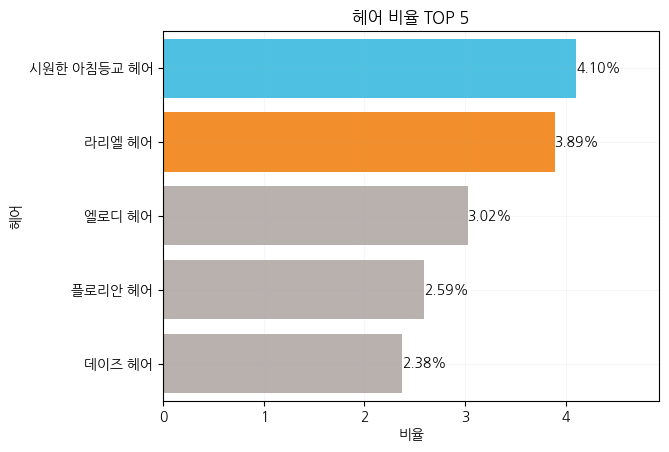

In [161]:
ax = sns.barplot(x='ratio', y='index', data=hair[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('헤어 비율 TOP 5')
plt.ylabel('헤어')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

463


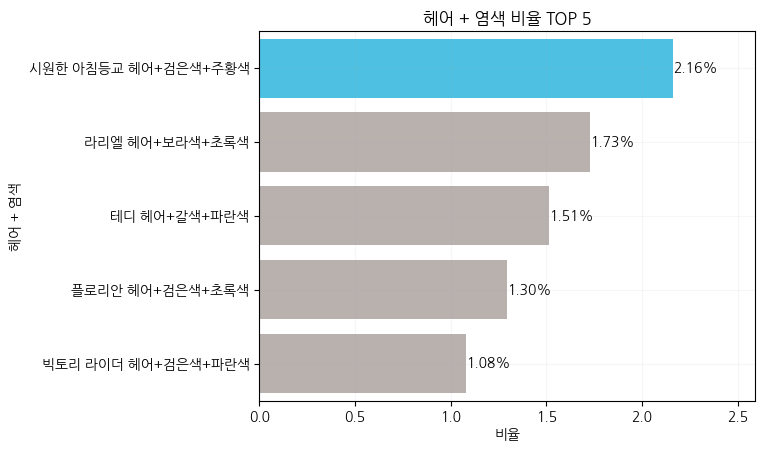

In [162]:
hair_2 = pd.DataFrame(character_beauty['hair'].value_counts()).reset_index(drop=False)
print(sum(hair_2['hair']))
hair_2['ratio'] = (hair_2['hair'] / sum(hair_2['hair'])) * 100

ax = sns.barplot(x='ratio', y='index', data=hair_2[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('헤어 + 염색 비율 TOP 5')
plt.ylabel('헤어 + 염색')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

In [163]:
hair_2

,index,hair,ratio
0,시원한 아침등교 헤어+검은색+주황색,10,2.159827
1,라리엘 헤어+보라색+초록색,8,1.727862
2,테디 헤어+갈색+파란색,7,1.511879
3,플로리안 헤어+검은색+초록색,6,1.295896
4,빅토리 라이더 헤어+검은색+파란색,5,1.079914
...,...,...,...
374,데이즈 헤어+갈색+노란색,1,0.215983
375,원더 바니+빨간색+파란색,1,0.215983
376,빅 포인트 헤어+보라색+빨간색,1,0.215983
377,블링 토벤 헤어+검은색+보라색,1,0.215983


19


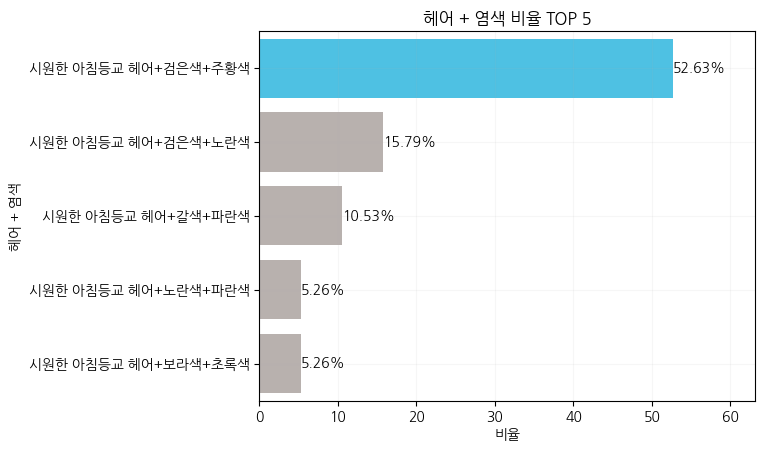

In [164]:
character_beauty_cool = character_beauty[character_beauty['hair_name'] == '시원한 아침등교 헤어']
hair_2_1 = pd.DataFrame(character_beauty_cool['hair'].value_counts()).reset_index(drop=False)
print(sum(hair_2_1['hair']))
hair_2_1['ratio'] = (hair_2_1['hair'] / sum(hair_2_1['hair'])) * 100

ax = sns.barplot(x='ratio', y='index', data=hair_2_1[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('헤어 + 염색 비율 TOP 5')
plt.ylabel('헤어 + 염색')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

In [165]:
hair_2_1

,index,hair,ratio
0,시원한 아침등교 헤어+검은색+주황색,10,52.631579
1,시원한 아침등교 헤어+검은색+노란색,3,15.789474
2,시원한 아침등교 헤어+갈색+파란색,2,10.526316
3,시원한 아침등교 헤어+노란색+파란색,1,5.263158
4,시원한 아침등교 헤어+보라색+초록색,1,5.263158
5,시원한 아침등교 헤어+갈색+검은색,1,5.263158
6,시원한 아침등교 헤어+X+검은색,1,5.263158


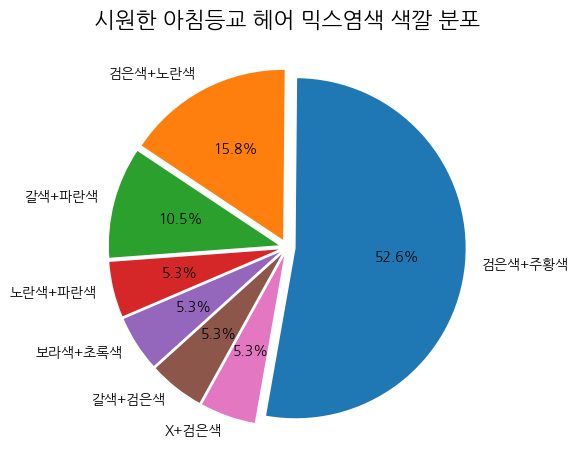

In [171]:
# colors = ['#4ec1e3', '#f28e2b']
hair_2_1['name'] = hair_2_1['index'].str[12:]
explode = [0.05] * len(hair_2_1)  # 모든 조각을 약간씩 분리
# colors = ['#4ec1e3', '#f28e2b', '#76b041', '#d74f38', '#8e44ad']
# 파이 차트 그리기
plt.pie(hair_2_1['ratio'], 
        labels=hair_2_1['name'], 
        autopct='%.1f%%', 
        # colors=colors,
        explode=explode, 
        startangle=260,# 차트 회전
        textprops={'fontsize': 10})  # 글꼴 크기 조정

# 차트 제목 설정
plt.title('시원한 아침등교 헤어 믹스염색 색깔 분포', fontsize=16)

# 레이아웃 조정 (레이블이 차트 밖으로 나가지 않도록)
plt.tight_layout()

# 차트 출력
plt.show()

18


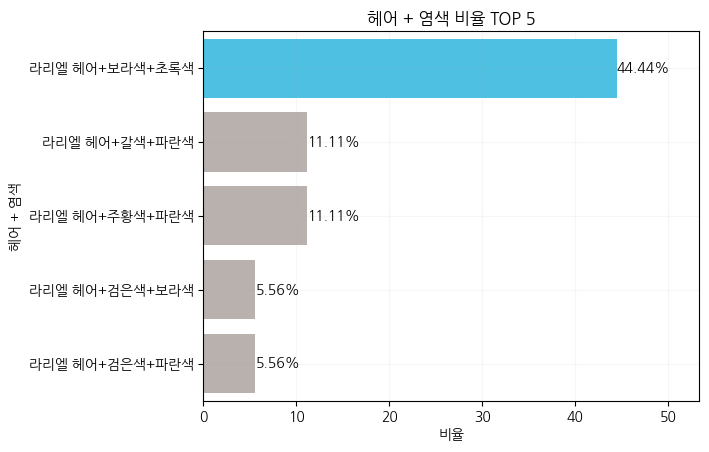

In [167]:
character_beauty_cool_2 = character_beauty[character_beauty['hair_name'] == '라리엘 헤어']
hair_2_2 = pd.DataFrame(character_beauty_cool_2['hair'].value_counts()).reset_index(drop=False)
print(sum(hair_2_2['hair']))
hair_2_2['ratio'] = (hair_2_2['hair'] / sum(hair_2_2['hair'])) * 100

ax = sns.barplot(x='ratio', y='index', data=hair_2_2[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('헤어 + 염색 비율 TOP 5')
plt.ylabel('헤어 + 염색')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

In [168]:
hair_2_2

,index,hair,ratio
0,라리엘 헤어+보라색+초록색,8,44.444444
1,라리엘 헤어+갈색+파란색,2,11.111111
2,라리엘 헤어+주황색+파란색,2,11.111111
3,라리엘 헤어+검은색+보라색,1,5.555556
4,라리엘 헤어+검은색+파란색,1,5.555556
5,라리엘 헤어+갈색+빨간색,1,5.555556
6,라리엘 헤어+초록색+파란색,1,5.555556
7,라리엘 헤어+빨간색+파란색,1,5.555556
8,라리엘 헤어+검은색+주황색,1,5.555556


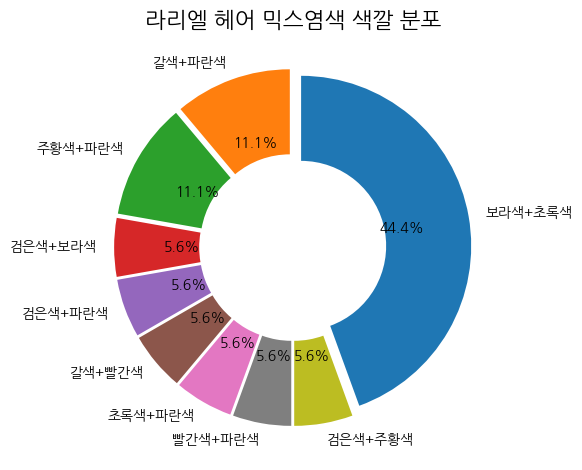

In [188]:
hair_2_2['name'] = hair_2_2['index'].str[7:]
explode = [0.05] * len(hair_2_2)  # 모든 조각을 약간씩 분리

# 파이 차트 그리기
plt.pie(hair_2_2['ratio'], 
        labels=hair_2_2['name'], 
        autopct='%.1f%%', 
        explode=explode, 
        startangle=290,# 차트 회전
        textprops={'fontsize': 10},
        wedgeprops=dict(width=0.5))  # 글꼴 크기 조정

# 차트 제목 설정
plt.title('라리엘 헤어 믹스염색 색깔 분포', fontsize=16)

# 레이아웃 조정 (레이블이 차트 밖으로 나가지 않도록)
plt.tight_layout()

# 차트 출력
plt.show()

463


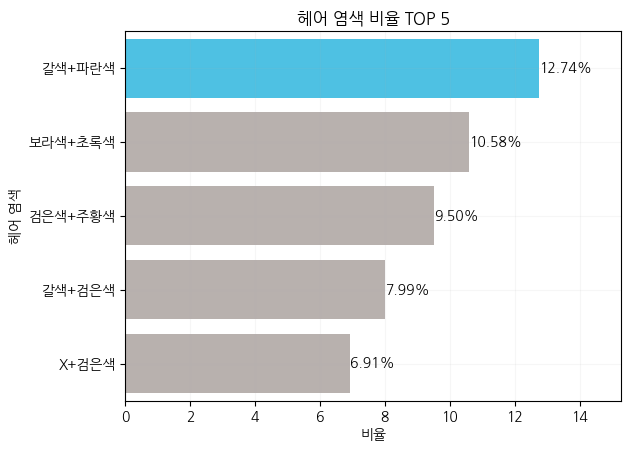

In [20]:
hair_3 = pd.DataFrame(character_beauty['hair_color'].value_counts()).reset_index(drop=False)
print(sum(hair_3['hair_color']))
hair_3['ratio'] = (hair_3['hair_color'] / sum(hair_3['hair_color'])) * 100

ax = sns.barplot(x='ratio', y='index', data=hair_3[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('헤어 염색 비율 TOP 5')
plt.ylabel('헤어 염색')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

463


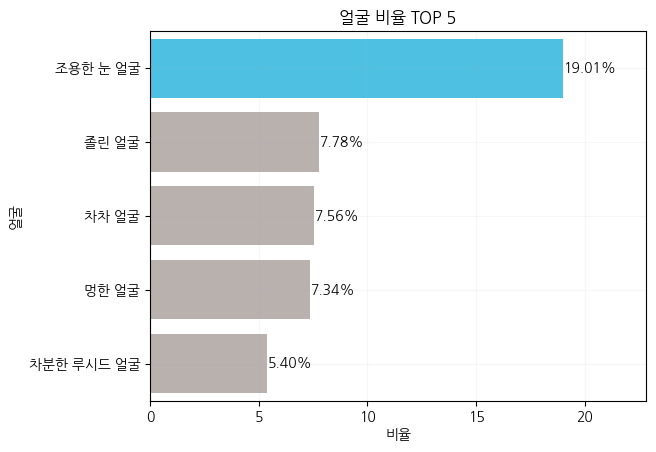

In [21]:
face_1 = pd.DataFrame(character_beauty['face_name'].value_counts()).reset_index(drop=False)
print(sum(face_1['face_name']))
face_1['ratio'] = (face_1['face_name'] / sum(face_1['face_name'])) * 100

ax = sns.barplot(x='ratio', y='index', data=face_1[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('얼굴 비율 TOP 5')
plt.ylabel('얼굴')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

463


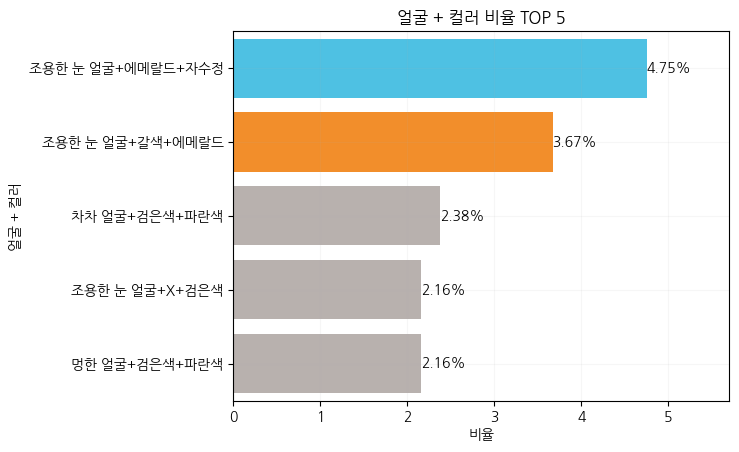

In [22]:
face_2 = pd.DataFrame(character_beauty['face'].value_counts()).reset_index(drop=False)
print(sum(face_2['face']))
face_2['ratio'] = (face_2['face'] / sum(face_2['face'])) * 100

ax = sns.barplot(x='ratio', y='index', data=face_2[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('얼굴 + 컬러 비율 TOP 5')
plt.ylabel('얼굴 + 컬러')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

In [178]:
character_beauty_cool_2 = character_beauty[character_beauty['face_name'] == '조용한 눈 얼굴']
# character_beauty_cool_2
face_2_1 = pd.DataFrame(character_beauty_cool_2['face'].value_counts()).reset_index(drop=False)
# face_2_1
face_2_1['ratio'] = (face_2_1['face'] / sum(face_2_1['face'])) * 100
face_2_1.head()

,index,face,ratio
0,조용한 눈 얼굴+에메랄드+자수정,22,25.000000
1,조용한 눈 얼굴+갈색+에메랄드,17,19.318182
2,조용한 눈 얼굴+X+검은색,10,11.363636
3,조용한 눈 얼굴+빨간색+에메랄드,5,5.681818
4,조용한 눈 얼굴+갈색+파란색,4,4.545455
5,조용한 눈 얼굴+빨간색+파란색,3,3.409091
6,조용한 눈 얼굴+검은색+파란색,3,3.409091
7,조용한 눈 얼굴+보라색+에메랄드,2,2.272727
8,조용한 눈 얼굴+보라색+파란색,2,2.272727
9,조용한 눈 얼굴+갈색+검은색,2,2.272727


In [190]:
character_beauty_cool_3 = character_beauty[character_beauty['face_name'] == '멍한 얼굴']
# character_beauty_cool_2
face_2_2 = pd.DataFrame(character_beauty_cool_3['face'].value_counts()).reset_index(drop=False)
# face_2_1
face_2_2['ratio'] = (face_2_2['face'] / sum(face_2_2['face'])) * 100
face_2_2.head()

,index,face,ratio
0,멍한 얼굴+검은색+파란색,10,29.411765
1,멍한 얼굴+에메랄드+자수정,8,23.529412
2,멍한 얼굴+X+검은색,4,11.764706
3,멍한 얼굴+빨간색+파란색,3,8.823529
4,멍한 얼굴+검은색+자수정,3,8.823529


463


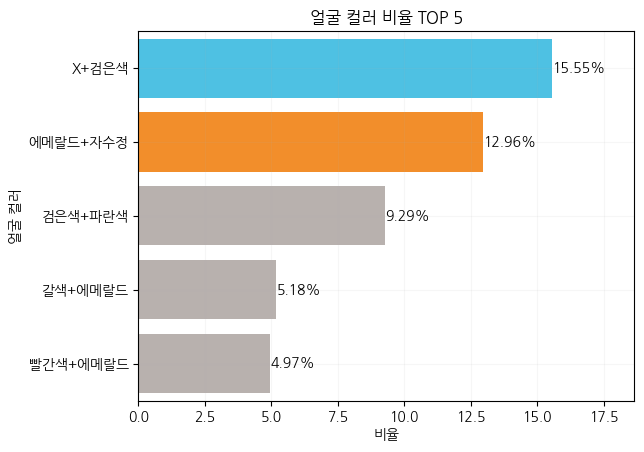

In [23]:
face_3 = pd.DataFrame(character_beauty['face_color'].value_counts()).reset_index(drop=False)
print(sum(face_3['face_color']))
face_3['ratio'] = (face_3['face_color'] / sum(face_3['face_color'])) * 100

ax = sns.barplot(x='ratio', y='index', data=face_3[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('얼굴 컬러 비율 TOP 5')
plt.ylabel('얼굴 컬러')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

463


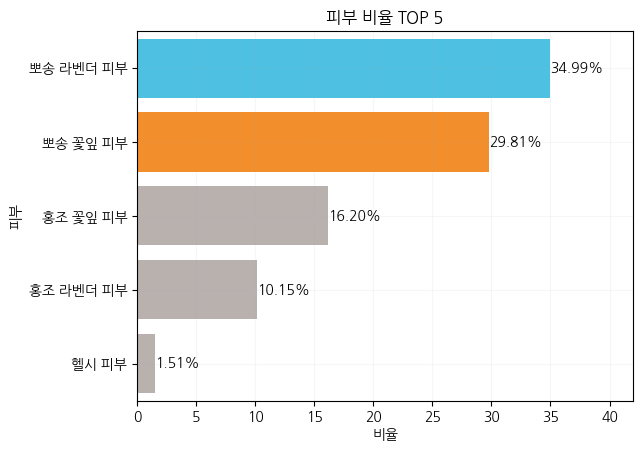

In [24]:
skin = pd.DataFrame(character_beauty['skin_name'].value_counts()).reset_index(drop=False)
print(sum(skin['skin_name']))
skin['ratio'] = (skin['skin_name'] / sum(skin['skin_name'])) * 100

ax = sns.barplot(x='ratio', y='index', data=skin[:5], color='#bab0ac', orient='h')

ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('피부 비율 TOP 5')
plt.ylabel('피부')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

In [25]:
###################################################

In [26]:
character_cashitem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3133 entries, 0 to 3132
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   character_name            3133 non-null   object
 1   world_name                3133 non-null   object
 2   character_gender          3133 non-null   object
 3   character_class           3133 non-null   object
 4   character_level           3133 non-null   int64 
 5   character_guild_name      3108 non-null   object
 6   cash_item_equipment_part  3133 non-null   object
 7   cash_item_name            3133 non-null   object
 8   cash_item_label           630 non-null    object
dtypes: int64(1), object(8)
memory usage: 220.4+ KB


In [27]:
# 총 유저수
len(set(character_cashitem['character_name']))

434

In [28]:
character_cashitem.drop(['character_guild_name'],axis=1,inplace=True)

In [29]:
character_cashitem.head()

,character_name,world_name,character_gender,character_class,character_level,cash_item_equipment_part,cash_item_name,cash_item_label
0,오지환,루나,여,키네시스,297,모자,보송 꿀벌 머리띠,NaN
1,오지환,루나,여,키네시스,297,얼굴장식,인형 보라,NaN
2,오지환,루나,여,키네시스,297,눈장식,투명 안경,NaN
3,오지환,루나,여,키네시스,297,한벌옷,별빛 꿀벌옷,NaN
4,오지환,루나,여,키네시스,297,신발,투명 신발,NaN


In [30]:
set(character_cashitem['cash_item_equipment_part'])

{'귀고리',
 '눈장식',
 '망토',
 '모자',
 '무기',
 '반지',
 '방패',
 '블레이드',
 '상의',
 '신발',
 '얼굴장식',
 '장갑',
 '하의',
 '한벌옷'}

In [31]:
ch = character_cashitem[['character_name','character_gender']].drop_duplicates()
ch['character_gender'].value_counts()

남     247
여     176
기타     11
Name: character_gender, dtype: int64

In [274]:
hat_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '모자'][['cash_item_name']])
hat = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '모자'][['cash_item_name']].value_counts()).reset_index(drop=False)
hat['ratio'] = (hat[0] / hat_count) * 100

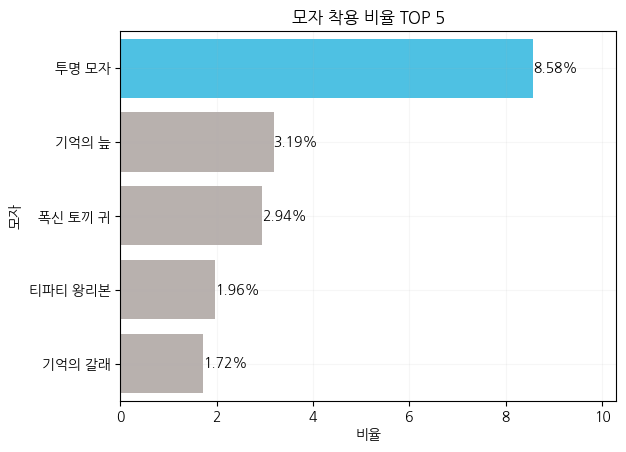

In [275]:
ax = sns.barplot(y='cash_item_name', x='ratio', data=hat[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('모자 착용 비율 TOP 5')
plt.ylabel('모자')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

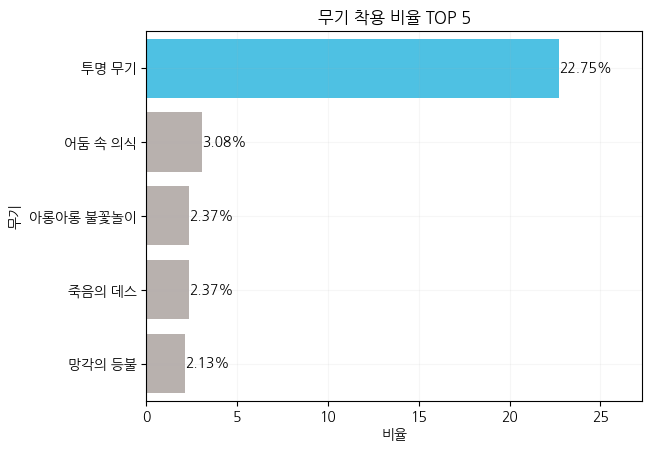

In [276]:
m_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '무기'][['cash_item_name']])
m = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '무기'][['cash_item_name']].value_counts()).reset_index(drop=False)
m['ratio'] = (m[0] / m_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=m[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('무기 착용 비율 TOP 5')
plt.ylabel('무기')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

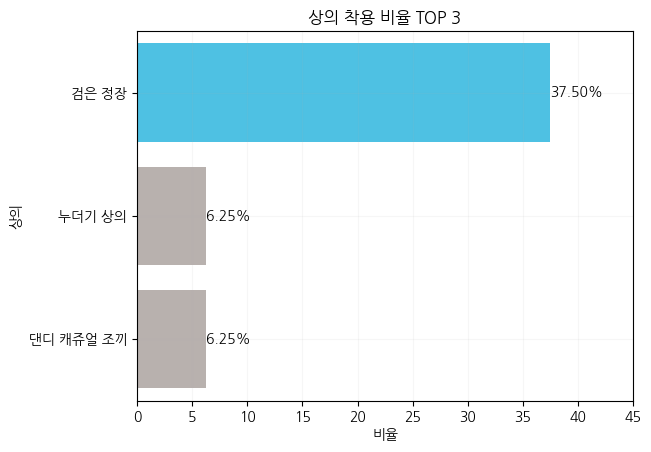

In [277]:
s_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '상의'][['cash_item_name']])
s = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '상의'][['cash_item_name']].value_counts()).reset_index(drop=False)
s['ratio'] = (s[0] / s_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=s[:3], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('상의 착용 비율 TOP 3')
plt.ylabel('상의')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

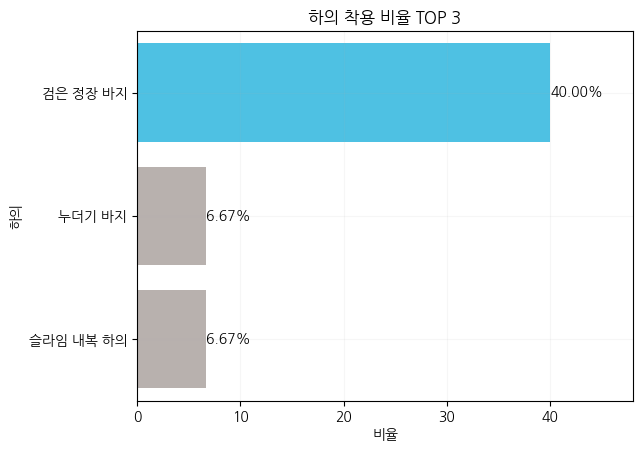

In [278]:
h_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '하의'][['cash_item_name']])
h = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '하의'][['cash_item_name']].value_counts()).reset_index(drop=False)
h['ratio'] = (h[0] / h_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=h[:3], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('하의 착용 비율 TOP 3')
plt.ylabel('하의')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

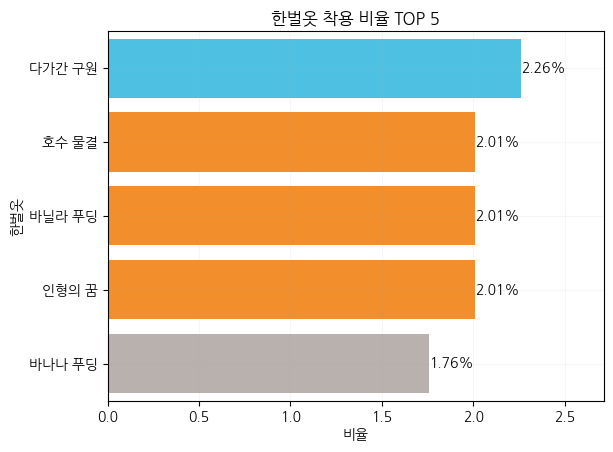

In [294]:
# 한벌옷
hh_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '한벌옷'][['cash_item_name']])
hh = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '한벌옷'][['cash_item_name']].value_counts()).reset_index(drop=False)
hh['ratio'] = (hh[0] / hh_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=hh[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')
ax.patches[2].set_facecolor('#f28e2b')
ax.patches[3].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('한벌옷 착용 비율 TOP 5')
plt.ylabel('한벌옷')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

In [281]:
print(s_count,h_count,hh_count)

16 15 398


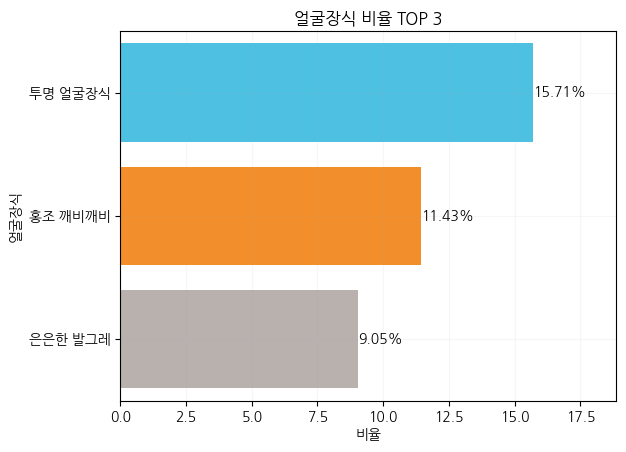

In [282]:
u_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '얼굴장식'][['cash_item_name']])
u = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '얼굴장식'][['cash_item_name']].value_counts()).reset_index(drop=False)
u['ratio'] = (u[0] / u_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=u[:3], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('얼굴장식 비율 TOP 3')
plt.ylabel('얼굴장식')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

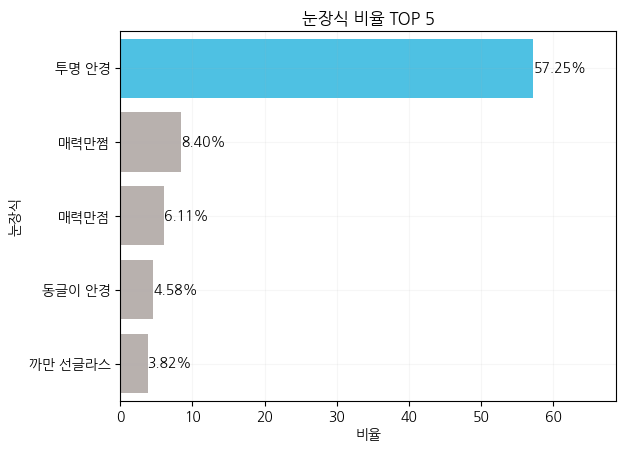

In [283]:
n_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '눈장식'][['cash_item_name']])
n = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '눈장식'][['cash_item_name']].value_counts()).reset_index(drop=False)
n['ratio'] = (n[0] / n_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=n[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('눈장식 비율 TOP 5')
plt.ylabel('눈장식')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

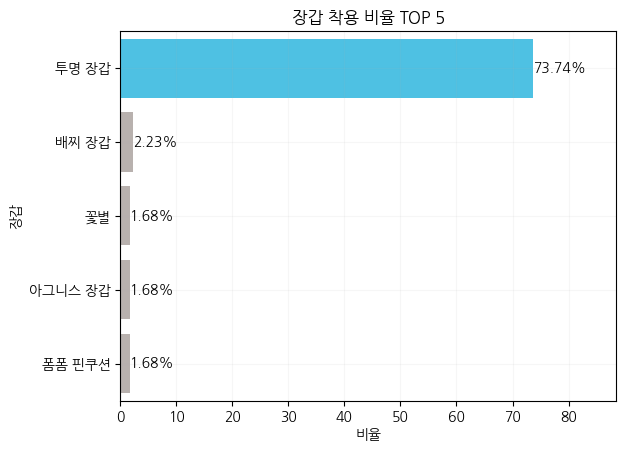

In [284]:
j_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '장갑'][['cash_item_name']])
j = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '장갑'][['cash_item_name']].value_counts()).reset_index(drop=False)
j['ratio'] = (j[0] / j_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=j[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('장갑 착용 비율 TOP 5')
plt.ylabel('장갑')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

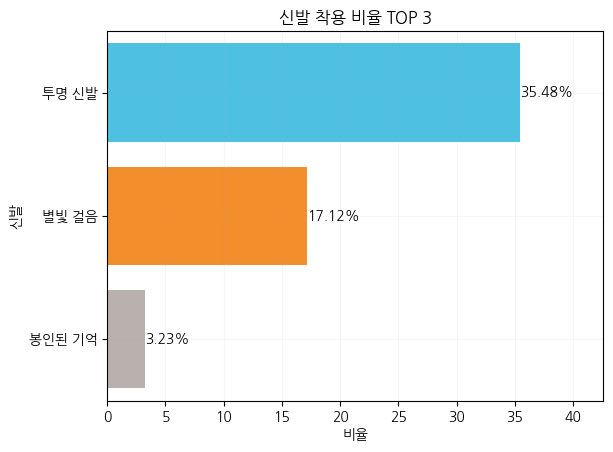

In [285]:
ss_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '신발'][['cash_item_name']])
ss = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '신발'][['cash_item_name']].value_counts()).reset_index(drop=False)
ss['ratio'] = (ss[0] / ss_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=ss[:3], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('신발 착용 비율 TOP 3')
plt.ylabel('신발')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

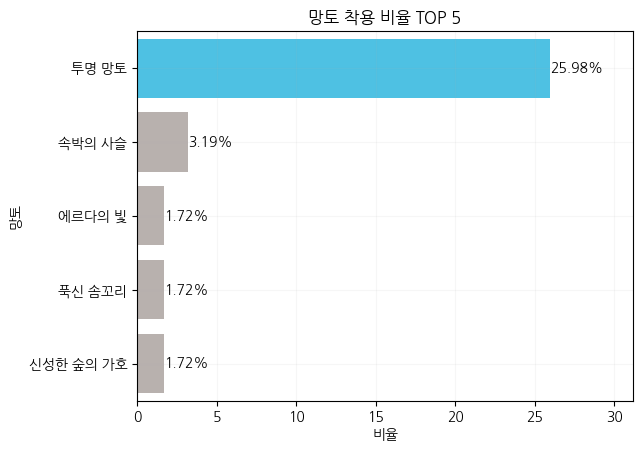

In [286]:
mm_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '망토'][['cash_item_name']])
mm = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '망토'][['cash_item_name']].value_counts()).reset_index(drop=False)
mm['ratio'] = (mm[0] / mm_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=mm[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('망토 착용 비율 TOP 5')
plt.ylabel('망토')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

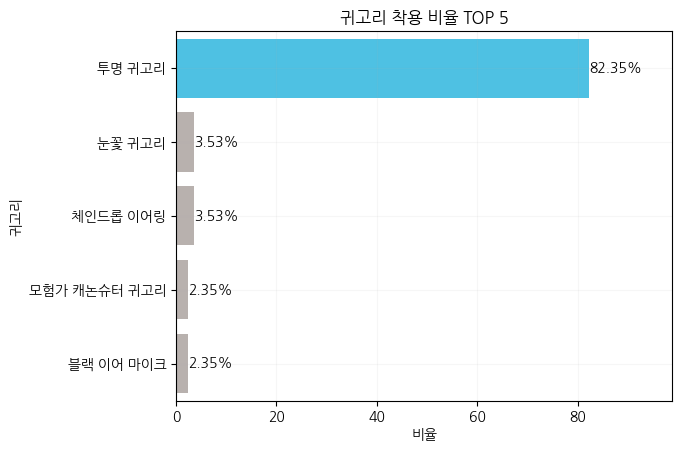

In [287]:
g_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '귀고리'][['cash_item_name']])
g = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '귀고리'][['cash_item_name']].value_counts()).reset_index(drop=False)
g['ratio'] = (g[0] / g_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=g[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('귀고리 착용 비율 TOP 5')
plt.ylabel('귀고리')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

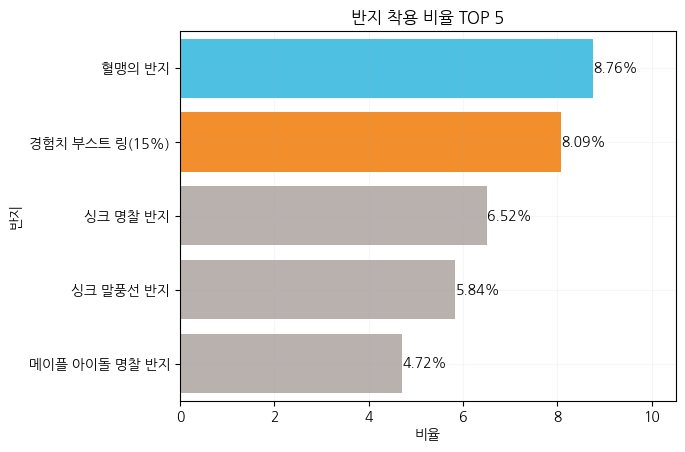

In [292]:
b_count = len(character_cashitem[character_cashitem['cash_item_equipment_part'] == '반지'][['cash_item_name']])
b = pd.DataFrame(character_cashitem[character_cashitem['cash_item_equipment_part'] == '반지'][['cash_item_name']].value_counts()).reset_index(drop=False)
b['ratio'] = (b[0] / b_count) * 100

ax = sns.barplot(y='cash_item_name', x='ratio', data=b[:5], color='#bab0ac',orient='h')
ax.patches[0].set_facecolor('#4ec1e3')
ax.patches[1].set_facecolor('#f28e2b')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height()/2., f'{width:.2f}%', 
            ha='left', va='center')

max_width = max(p.get_width() for p in ax.patches)
plt.xlim(0, max_width * 1.2)
plt.title('반지 착용 비율 TOP 5')
plt.ylabel('반지')
plt.xlabel('비율')
plt.grid(alpha=0.1)
plt.show()

In [90]:
import matplotlib.font_manager as fm

# 나눔고딕 폰트 찾기
nanum_fonts = [f for f in fm.fontManager.ttflist if 'Nanum' in f.name]

if nanum_fonts:
    print("나눔고딕 폰트 경로:", nanum_fonts[0].fname)
else:
    print("나눔고딕 폰트를 찾을 수 없습니다.")

나눔고딕 폰트 경로: c:\Users\dufwn\anaconda3\envs\mini7\lib\site-packages\koreanize_matplotlib\fonts\NanumGothicBold.ttf


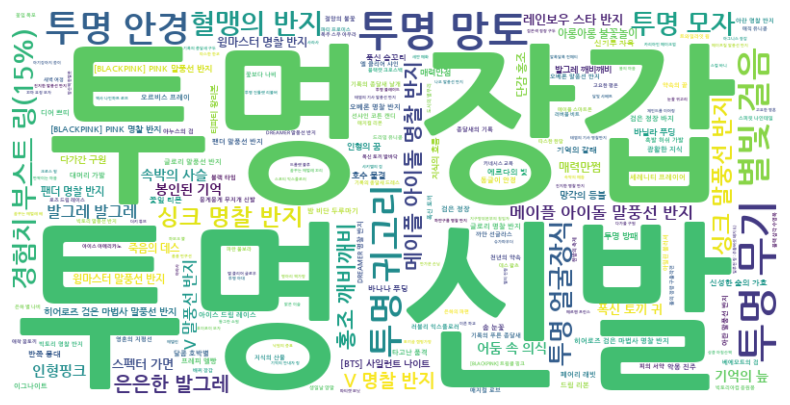

In [91]:
font_path = 'c:/Users/dufwn/anaconda3/envs/mini7/lib/site-packages/koreanize_matplotlib/fonts/NanumGothicBold.ttf'  

# 폰트 속성 설정
font_prop = fm.FontProperties(fname=font_path)

# 캐시 아이템 사용 패턴 워드클라우드
cash_items = character_cashitem['cash_item_name'].value_counts()

wordcloud = WordCloud(
    font_path=font_path,
    width=800, 
    height=400, 
    background_color='white'
).generate_from_frequencies(cash_items)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('캐시 아이템 사용 패턴 워드클라우드', fontproperties=font_prop, fontsize=15)
plt.show()

In [193]:
character_cashitem


,character_name,world_name,character_gender,character_class,character_level,character_guild_name,cash_item_equipment_part,cash_item_name,cash_item_label
0,오지환,루나,여,키네시스,297,루나,모자,보송 꿀벌 머리띠,NaN
1,오지환,루나,여,키네시스,297,루나,얼굴장식,인형 보라,NaN
2,오지환,루나,여,키네시스,297,루나,눈장식,투명 안경,NaN
3,오지환,루나,여,키네시스,297,루나,한벌옷,별빛 꿀벌옷,NaN
4,오지환,루나,여,키네시스,297,루나,신발,투명 신발,NaN
...,...,...,...,...,...,...,...,...,...
3128,난쟁아,스카니아,여,비숍,291,전설,모자,드림 리본,스페셜라벨
3129,난쟁아,스카니아,여,비숍,291,전설,한벌옷,바나나 푸딩,스페셜라벨
3130,난쟁아,스카니아,여,비숍,291,전설,신발,투명 신발,NaN
3131,난쟁아,스카니아,여,비숍,291,전설,망토,쏟아지는 햇살,스페셜라벨


In [218]:
pivot_df = character_cashitem.pivot_table(index=['character_name', 'world_name', 'character_gender', 
                                                 'character_class', 'character_level', 'character_guild_name'],
                                          columns='cash_item_equipment_part',
                                          values='cash_item_name',
                                          aggfunc=lambda x: ' '.join(x)).sort_values('character_level',ascending=False)

# 피벗된 결과를 보기 좋게 하기 위해 열 이름을 정리합니다.
pivot_df.reset_index(inplace=True)
pivot_df

cash_item_equipment_part,character_name,world_name,character_gender,character_class,character_level,character_guild_name,귀고리,눈장식,망토,모자,무기,반지,방패,블레이드,상의,신발,얼굴장식,장갑,하의,한벌옷
0,오지환,루나,여,키네시스,297,루나,NaN,투명 안경,꿀벌 요정 날개,보송 꿀벌 머리띠,해바라기 큰송이,NaN,NaN,NaN,NaN,투명 신발,인형 보라,투명 장갑,NaN,별빛 꿀벌옷
1,단솜,스카니아,여,윈드브레이커,297,봄연,NaN,NaN,푹신 솜꼬리,방울 고깔,나도 데려가!,NaN,NaN,NaN,NaN,반쪽 붕대,NaN,NaN,NaN,아린 장미
2,테룽이,이노시스,남,카이저,296,프라하,NaN,NaN,밤 비단 두루마기,냥냥 머리띠,천년의 약속,NaN,NaN,NaN,NaN,별을 담은 신,NaN,NaN,NaN,별을 담은 밤하늘
3,카사,스카니아,남,팬텀,296,악마,NaN,LED 선글라스,영원 궤도,하보크 뿔,절망의 불꽃,NaN,NaN,NaN,검은 정장,검은색 정장 구두,카리아인 메이크업,아그니스 장갑,검은 정장 바지,NaN
4,보마노랑이,제니스,여,보우마스터,296,달치즈,NaN,NaN,꿈꾸는 애벌레 꼬리,꿈꾸는 애벌레 더듬이,꿈틀꿈틀 꿈사과,싱크 말풍선 반지 싱크 명찰 반지,NaN,NaN,NaN,꿈꾸는 애벌레 장화,스펙터 가면,꿈꾸는 애벌레 장갑,NaN,꿈꾸는 애벌레 배
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,팔라디,베라,남,팔라딘,291,순애,NaN,투명 안경,달나라 미니 은하수,마이크 탈,모험가 팔라딘 해머,메이플 아이돌 명찰 반지 메이플 아이돌 말풍선 반지,NaN,NaN,NaN,모험가 팔라딘 부츠,NaN,NaN,NaN,모험가 팔라딘 아머
427,포던,엘리시움,남,듀얼블레이더,291,BOSS,NaN,NaN,투명 망토,만지 탈,투명 무기,NaN,NaN,투명 블레이드,NaN,모험가 듀얼블레이드 부츠,인형핑크,투명 장갑,NaN,로얄 어드벤쳐 슈트 (도적)
428,섈업,스카니아,남,섀도어,291,무무,NaN,NaN,봄의 마음,매직 유니콩,아이스 아메리카노,NaN,NaN,NaN,NaN,투명 신발,은은한 발그레,NaN,NaN,드리밍 유니콩
429,금개,루나,기타,제로,291,뉴프랜,투명 귀고리,투명 안경,마지막 심판,서늘한 종언,절망의 불꽃,히어로즈 검은 마법사 명찰 반지 히어로즈 검은 마법사 말풍선 반지,NaN,NaN,NaN,지나간 어둠,기사단장 이카르트 가면,투명 장갑,NaN,어둠의 심판관


In [219]:
merged_data = pd.merge(character_beauty,pivot_df, on=['character_name', 'world_name', 'character_gender', 'character_class', 'character_level'])

In [220]:
merged_data

,character_name,world_name,character_gender,character_class,character_level,hair_name,face_name,skin_name,hair_color,hair,...,무기,반지,방패,블레이드,상의,신발,얼굴장식,장갑,하의,한벌옷
0,오지환,루나,여,키네시스,297,블랑슈 헤어,조용한 눈 얼굴,홍조 라벤더 피부,갈색+보라색,블랑슈 헤어+갈색+보라색,...,해바라기 큰송이,NaN,NaN,NaN,NaN,투명 신발,인형 보라,투명 장갑,NaN,별빛 꿀벌옷
1,단솜,스카니아,여,윈드브레이커,297,말괄량이 헤어,졸린 오드아이 얼굴,커스텀 홍조 피치 피부,보라색+초록색,말괄량이 헤어+보라색+초록색,...,나도 데려가!,NaN,NaN,NaN,NaN,반쪽 붕대,NaN,NaN,NaN,아린 장미
2,버터,엘리시움,남,나이트로드,296,플로리안 헤어,졸린 얼굴,뽀송 라벤더 피부,검은색+초록색,플로리안 헤어+검은색+초록색,...,어둠 속 의식,혈맹의 반지 경험치 부스트 링(15%) 오로라 반지,NaN,NaN,NaN,봉인된 기억,오렌지 발그레,폼폼 핀쿠션,NaN,다가간 구원
3,솝상,크로아,여,비숍,296,여우소녀 헤어,뭐요 얼굴,홍조 꽃잎 피부,X+초록색,여우소녀 헤어+X+초록색,...,샤키엘의 검,일루전 링 : 레이스캡 검은색고양이,NaN,NaN,NaN,별하늘 꽃술,NaN,NaN,NaN,난빛 항아
4,테룽이,이노시스,남,카이저,296,프림로즈 헤어,흥흥 얼굴,뽀송 꽃잎 피부,X+검은색,프림로즈 헤어+X+검은색,...,천년의 약속,NaN,NaN,NaN,NaN,별을 담은 신,NaN,NaN,NaN,별을 담은 밤하늘
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,듀대,엘리시움,여,듀얼블레이더,291,안젤라 헤어,아잉 얼굴,뽀송 꽃잎 피부,검은색+보라색,안젤라 헤어+검은색+보라색,...,다이아 곡괭이,NaN,NaN,NaN,NaN,스윗 디어 발찌,체리맛 아이스바,NaN,NaN,고요한 은하
453,강우현,엘리시움,남,듀얼블레이더,291,플로우 헤어,멍한 오드아이 얼굴,홍조 꽃잎 피부,검은색+빨간색,플로우 헤어+검은색+빨간색,...,선샤인 코튼 캔디,NaN,NaN,NaN,NaN,폭신 토끼 발바닥,NaN,NaN,NaN,폭신 토끼
454,토햐,스카니아,여,비숍,291,비숍 헤어,조용한 눈 얼굴,뽀송 라벤더 피부,주황색+파란색,비숍 헤어+주황색+파란색,...,별의 전령,NaN,NaN,NaN,NaN,별빛 걸음,NaN,NaN,NaN,고상한 명작
455,느밍,베라,남,메르세데스,291,시원한 아침등교 헤어,조용한 눈 얼굴,뽀송 꽃잎 피부,X+검은색,시원한 아침등교 헤어+X+검은색,...,악몽 시계,NaN,NaN,NaN,NaN,속박의 매듭,NaN,NaN,NaN,페일 드림


In [224]:
black = merged_data[merged_data['하의'] == '검은 정장 바지'][['모자']]
black

,모자
6,하보크 뿔
17,가면신사의 모자
88,투명 모자
206,대머리 가발
251,대머리 가발
322,종이봉투
